In [44]:
from math import sin,pow
from matplotlib import pylab as plt
import numpy as np
from math import exp
from scipy import optimize 
import pandas as pd

In [53]:
quantity_means=1000
fd=10
pi=3.141596
f=np.arange(0.01,0.25,0.001)*fd
N=np.arange(100,1000,10)
mictake=0

In [39]:
signature_of_data=pd.DataFrame(columns=['T','f','N','x(t)'])

In [90]:
for i in range(quantity_means):
    q=i%len(f)
    w=i%len(N)
    signature_of_data.loc[len(signature_of_data)]=[i,f[q],N[w],sin(2*pi*(f[q]+i)*i)*100]

In [91]:
def aproxmate_signatute(x):
    mictake=0
    for i in range(quantity_means):
        mean_in_this_step=x[0]*signature_of_data['T'][i]+x[1]*pow(signature_of_data['T'][i],2)+x[2]*pow(signature_of_data['T'][i],3)+x[3]*signature_of_data['f'][i]+x[4]*pow(signature_of_data['f'][i],2)+x[5]*pow(signature_of_data['f'][i],3)+x[6]*signature_of_data['N'][i]+x[7]*pow(signature_of_data['N'][i],2)+x[8]*pow(signature_of_data['N'][i],3)+x[9]+x[10]*pow(signature_of_data['T'][i],4)+x[11]*pow(signature_of_data['T'][i],5)+x[12]*pow(signature_of_data['T'][i],6)+x[13]*pow(signature_of_data['T'][i],7)+x[14]*pow(signature_of_data['T'][i],8)
        mictake+=pow(signature_of_data['x(t)'][i]-mean_in_this_step,2)/quantity_means
    return mictake

In [93]:
x=np.array([0,0,0,0,0,1,0,0,0,0,0,1,0,0,0])
print aproxmate_signatute(x)

9.04099242414e+28


In [94]:
res=optimize.minimize(aproxmate_signatute,x,method='BFGS')

In [95]:
aproxmate_signatute(res.x)

1.6714146766752557e+28

In [96]:
y=pd.DataFrame(columns=['y'])
x=np.arange(1,100,1)
for i in x:
    y.loc[len(y)]=[res.x[0]*signature_of_data['T'][i]+res.x[1]*pow(signature_of_data['T'][i],2)+res.x[2]*pow(signature_of_data['T'][i],3)+res.x[3]*signature_of_data['f'][i]+res.x[4]*pow(signature_of_data['f'][i],2)+res.x[5]*pow(signature_of_data['f'][i],3)+res.x[6]*signature_of_data['N'][i]+res.x[7]*pow(signature_of_data['N'][i],2)+res.x[8]*pow(signature_of_data['N'][i],3)+res.x[9]+res.x[10]*pow(signature_of_data['T'][i],4)+res.x[11]*pow(signature_of_data['T'][i],5)+res.x[12]*pow(signature_of_data['T'][i],6)+res.x[13]*pow(signature_of_data['T'][i],7)+res.x[14]*pow(signature_of_data['T'][i],8)]

In [97]:
res.x

array([ 0.00000000e+00,  0.00000000e+00, -3.66918440e-25,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.64818978e-25,  0.00000000e+00, -3.30732825e-22,  1.00000000e+00,
       -2.75341174e-16, -2.55670687e-13, -1.68021720e-09])

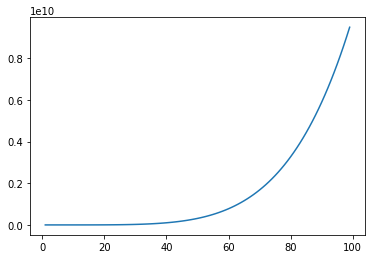

In [98]:
plt.plot(x,y)

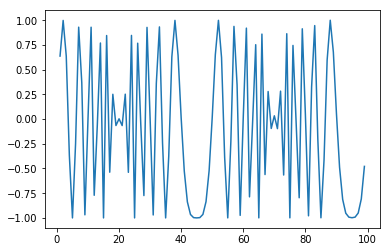

In [89]:
plt.plot(x,signature_of_data['x(t)'][x])